<a href="https://colab.research.google.com/github/AneesPeringal/handover/blob/main/twist_network_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import time
import random
import scipy.io as spio
import seaborn
import matplotlib
from matplotlib import pyplot as plt
from sklearn import preprocessing
from keras.layers import TimeDistributed
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import tensorflow as tf
from math import sqrt
from keras.backend import clear_session
import copy
from sklearn.metrics import accuracy_score
import math


In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import math
roll = 0
pitch = 0
yaw = math.pi
Rx = np.array([[1, 0, 0], [0,math.cos(roll), -math.sin(roll)], [0, math.sin(roll), math.cos(roll)]])
print(Rx)


[[ 1.  0.  0.]
 [ 0.  1. -0.]
 [ 0.  0.  1.]]


In [5]:
def R_2IB(roll,pitch,yaw,acc_x,acc_y,acc_z):
  Rx = np.array([[1, 0, 0], [0, math.cos(roll), -math.sin(roll)],[0, math.sin(roll), math.cos(roll)]])
  Ry = np.array([[math.cos(pitch), 0, math.sin(pitch)],[0, 1, 0],[-math.sin(pitch), 0, math.cos(pitch)]])
  Rz = np.array([[math.cos(yaw), -math.sin(yaw), 0],[math.sin(yaw), math.cos(yaw), 0],[0, 0, 1]])



In [6]:
num_flights = 7
features = 9
flights = [[] for _ in range(num_flights)]


In [7]:
flights[0] = spio.loadmat("/content/drive/My Drive/Colab Notebooks/flight_data/flight1_final.mat")
flights[1] = spio.loadmat("/content/drive/My Drive/Colab Notebooks/flight_data/flight2_final.mat")
flights[2] = spio.loadmat("/content/drive/My Drive/Colab Notebooks/flight_data/flight3_final.mat")
flights[3] = spio.loadmat("/content/drive/My Drive/Colab Notebooks/flight_data/flight4_final.mat")
flights[4] = spio.loadmat("/content/drive/My Drive/Colab Notebooks/flight_data/flight5_final.mat")
flights[5] = spio.loadmat("/content/drive/My Drive/Colab Notebooks/flight_data/flight6_final.mat")
flights[6] = spio.loadmat("/content/drive/My Drive/Colab Notebooks/flight_data/flight7_final.mat")


In [8]:
error_z = [[]for _ in range(num_flights)]
acc_x = [[]for _ in range(num_flights)]
acc_y = [[]for _ in range(num_flights)]
acc_z = [[]for _ in range(num_flights)]
roll = [[]for _ in range(num_flights)]
pitch = [[]for _ in range(num_flights)]
yaw = [[]for _ in range(num_flights)]
motor1 = [[]for _ in range(num_flights)]
motor2 = [[]for _ in range(num_flights)]
labels = [[]for _ in range(num_flights)]
for i in range(num_flights):
  error_z[i] = flights[i]['data'][1][1200:-103]
  acc_x[i] = flights[i]['data'][2][1200:-103]
  acc_y[i] = flights[i]['data'][3][1200:-103]
  acc_z[i] = flights[i]['data'][4][1200:-103]
  roll[i] = flights[i]['data'][5][1200:-103]
  pitch[i] = flights[i]['data'][6][1200:-103]
  yaw[i] = flights[i]['data'][7][1200:-103]
  motor1[i] = flights[i]['motor1'].T[1200:-103]
  motor2[i] = flights[i]['motor2'].T[1200:-103]
  labels[i] = flights[i]['label'].T[1200:-103]
  # error_z[i] = flights[i]['data'][1]
  # acc_x[i] = flights[i]['data'][2]
  # acc_y[i] = flights[i]['data'][3]
  # acc_z[i] = flights[i]['data'][4]
  # roll[i] = flights[i]['data'][5]
  # pitch[i] = flights[i]['data'][6]
  # yaw[i] = flights[i]['data'][7]
  # motor1[i] = flights[i]['motor1']
  # motor2[i] = flights[i]['motor2']
  # labels[i] = flights[i]['label'].T



In [9]:
np.shape(error_z[2])

(21776,)

In [10]:
np.shape(labels[2])

(21776, 1)

<function matplotlib.pyplot.show>

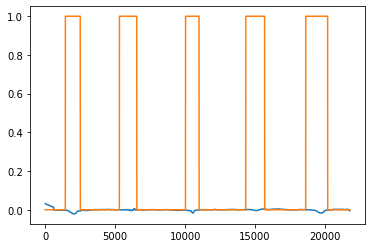

In [11]:
plt.plot(error_z[2])
plt.plot(labels[2])
plt.show


In [12]:
#getting the features
l2_acc_in = [[] for i in range(num_flights)]
l2_ori = [[] for i in range(num_flights)]
dist = [[] for i in range(num_flights)]

#for i in range(num_flights):
  #for j in range(error_z[i]):


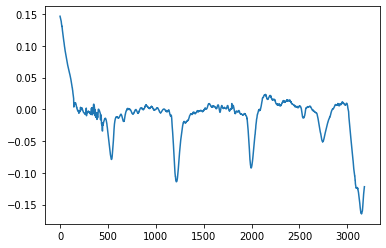

In [13]:
## downsample
z = error_z[0]
z_downsampled = []
counter = 0
sum =0
for i in range(len(z)):
  if counter < 5:
    sum = sum+z[i]
    counter = counter+1


  else:
    z_downsampled.append(sum)
    sum =0
    counter = 0

plt.plot(z_downsampled)


In [14]:
app_z = np.hstack((error_z[0], error_z[1], error_z[2], error_z[3], error_z[4], error_z[5], error_z[6]))
app_acc_x = np.hstack((acc_x[0], acc_x[1], acc_x[2], acc_x[3], acc_x[4], acc_x[5], acc_x[6]))
app_acc_y = np.hstack((acc_y[0], acc_y[1], acc_y[2], acc_y[3], acc_y[4], acc_y[5], acc_y[6]))
app_acc_z = np.hstack((acc_z[0], acc_z[1], acc_z[2], acc_z[3], acc_z[4], acc_z[5], acc_z[6]))
app_roll = np.hstack((roll[0], roll[1], roll[2], roll[3], roll[4], roll[5], roll[6]))
app_pitch = np.hstack((pitch[0], pitch[1], pitch[2], pitch[3], pitch[4], pitch[5], pitch[6]))
app_yaw = np.hstack((yaw[0], yaw[1], yaw[2], yaw[3], yaw[4], yaw[5], yaw[6]))



In [15]:
print(np.shape(pitch[0]))
print(np.shape(yaw[0]))

(19079,)
(19079,)


In [16]:
app_motor1 = np.vstack((motor1[0], motor1[1], motor1[2], motor1[3], motor1[4], motor1[5], motor1[6]))
app_motor2 = np.vstack((motor2[0], motor2[1], motor2[2], motor2[3], motor2[4], motor2[5], motor2[6]))
app_label = np.vstack((labels[0],labels[1], labels[2],labels[3], labels[4], labels[5], labels[6]))

In [17]:
# app_motor1 = app_motor1.flatten()
# app_motor2 =app_motor2.flatten()
# app_label = app_label.flatten()


In [18]:
def remap(array):
  minimum = min(array)
  maximum = max(array)
  return((array-minimum)/(maximum-minimum))


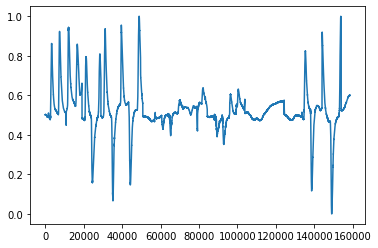

In [19]:
plt.plot(remap(app_yaw))

In [20]:
print(np.shape(app_z))
print(np.shape(app_roll))
print(np.shape(app_pitch))
print(np.shape(app_yaw))
print(np.shape(app_acc_x))
print(np.shape(app_acc_y))
print(np.shape(app_acc_z))

(158356,)
(158356,)
(158356,)
(158356,)
(158356,)
(158356,)
(158356,)


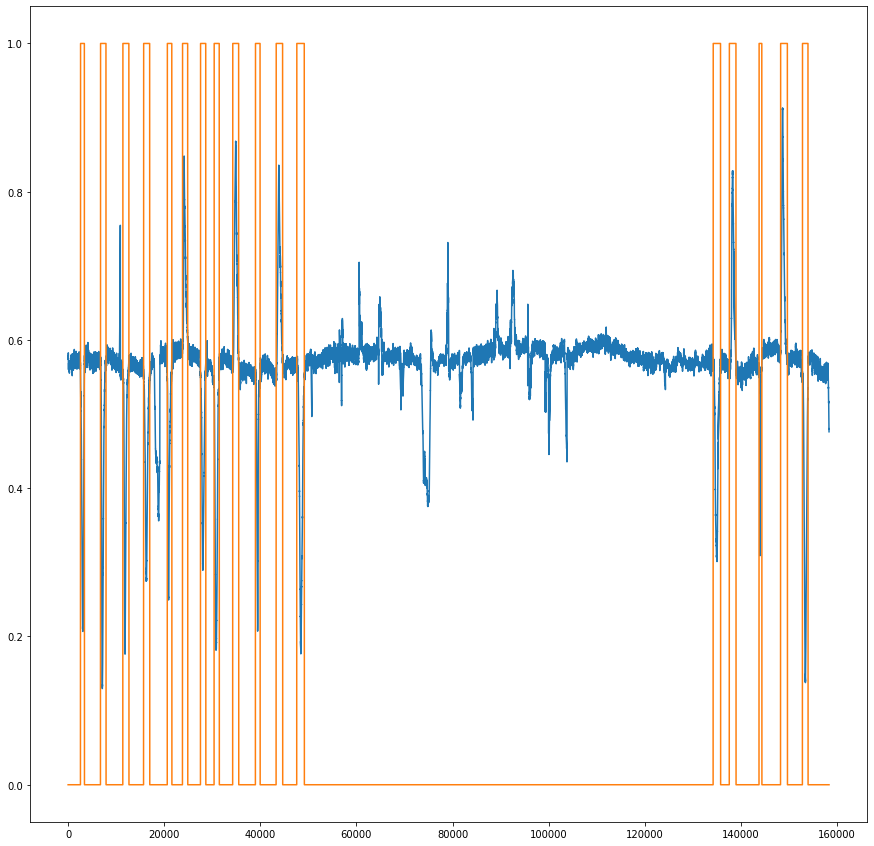

In [21]:
plt.figure(figsize = (15,15))
plt.plot(app_motor1)
plt.plot(app_label)
plt.show()
## the middle part are not really twists, I am just puching the drone in different directions so that the model can reject other disturbances.

In [22]:
print(app_z)
print(np.shape(app_z))

[ 0.02934402  0.02931297  0.02931297 ... -0.00358701 -0.00358701
 -0.00358701]
(158356,)


In [23]:
app_motor1 = app_motor1.flatten()
app_motor2 = app_motor2.flatten()
app_label = app_label.flatten()

In [24]:
print(app_motor1)
print(np.shape(app_motor1))

[0.57805549 0.57761625 0.57707677 ... 0.47689996 0.47633049 0.47615479]
(158356,)


In [25]:
data = [app_z, app_roll, app_pitch, app_acc_x, app_acc_y, app_acc_z,app_motor1,app_motor2]  #just for ease of looping
for i in range(len(data)):
  data[i] = np.hstack((data[i][:120000],data[i][120106:]))
app_label = np.hstack((app_label[:120000],app_label[120106:]))
# app_z = np.hstack((app_z[:120000],app_z[120106:]))
# app_roll = np.hstack((app_roll[:120000],app_roll[120106:]))
# app_pitch = np.hstack((app_pitch[:120000],app_pitch[120106:]))
# app_yaw = np.hstack((app_yaw[:120000],app_yaw[120106:]))
# app_acc_x = np.hstack((app_acc_x[:120000],app_acc_x[120106:]))
# app_acc_y = np.hstack((app_acc_y[:120000],app_acc_y[120106:]))
# app_acc_Z = np.hstack((app_acc_z[:120000],app_acc_z[120106:]))
# app_motor1 = np.vstack((app_motor1[:120000],app_motor1[120106:]))
# app_motor2 = np.vstack((app_motor2[:120000],app_motor2[120106:]))
# app_label = np.vstack((app_label[:120000],app_label[120106:]))

In [26]:
#normalizing the data to avoid bias
for i in range(len(data)):
  data[i] = remap(data[i])



In [27]:

print(np.shape(data))
print(np.shape(app_label))

(8, 158250)
(158250,)


In [28]:
data = np.array(data)
data = data.T

In [29]:
#splitting the data into windows
window_size=250
num_windows = int(len(data)/window_size)
num_features = np.shape(data)[1]

data_sampled = np.zeros((num_windows, window_size, num_features))

for i in range(num_windows):
  data_sampled[i][:][:] = data[window_size*i:window_size*(i+1)][:]

data_labels = np.reshape(app_label,(num_windows,window_size,1))


In [30]:
print(np.shape(data_sampled), np.shape(data_labels))

(633, 250, 8) (633, 250, 1)


In [31]:
#balancing the data
data_balanced = data[:][:]
data_labels_balanced  = np.asarray([item for sublist in data_labels for item in sublist])
num_features =8
while np.count_nonzero(data_labels_balanced ==1)<np.count_nonzero(data_labels_balanced ==0):
  count =0
  for i in range(len(data_labels)):
    if np.count_nonzero(data_labels[i,:,0]==1) > window_size // 2:
      count = count+1
      data_balanced = np.vstack((data_balanced, np.reshape(data_balanced[i*window_size:i*window_size+window_size],(window_size, num_features))))
      data_labels_balanced = np.vstack((data_labels_balanced, np.reshape(data_labels_balanced[i*window_size:i*window_size+window_size],(window_size,1))))
      if np.count_nonzero(data_labels[i+1,:,0]==1) > 0:
        for count in range(1):
          data_balanced = np.vstack((data_balanced, np.reshape(data_balanced[(i+1)*window_size:(i+1)*window_size+window_size],(window_size,num_features))))
          data_labels_balanced = np.vstack((data_labels_balanced, np.reshape(data_labels_balanced[(i+1)*window_size:(i+1)*window_size+window_size],(window_size,1))))
      if np.count_nonzero(data_labels_balanced==1) == np.count_nonzero(data_labels_balanced==0):
        break
  print(np.shape(data_balanced))

(195500, 8)
(232750, 8)
(270000, 8)
(307250, 8)


In [32]:
print(np.count_nonzero(data_labels_balanced ==1),np.count_nonzero(data_labels_balanced ==0))

155663 151587


In [33]:
#scaler


if I want to get the norms later, I should do that the latest over here


In [34]:
#data augmentation
# noise = np.random.normal(0,0.01/4, 633*250)
# bias = 0.05
# data_augmented =[[]for _ in range(len(data))]
# data_motor_aug =[[]for _ in range(len(data))]
# for i in range(len(data)):
#   data_augmented[i] = np.hstack((data[i],data[i]+noise,data[i]+noise-bias,data[i]+2*noise-bias, data[i]+noise*2))
# label_aug = np.vstack((app_label,app_label,app_label,app_label,app_label))

# data_motor_aug[0] = data_motor_aug[0].T
# data_motor_aug[1] = data_motor_aug[1].T
# print(np.shape(data_augmented[0]))
# print(np.shape(data_motor_aug[0]))
# print(np.shape(label_aug))

noise = np.random.normal(0,0.01/4,np.shape(data_balanced)[0]*np.shape(data_balanced)[1])
noise = np.reshape(noise, (np.shape(data_balanced)[0],np.shape(data_balanced)[1]))
bias =0.05
data_augmented = np.vstack((data_balanced, data_balanced+noise, data_balanced+noise-bias, data_balanced+2*noise-bias, data_balanced+noise*2))

print(np.shape(data_augmented))

data_labels_augmented = np.vstack((data_labels_balanced, data_labels_balanced, data_labels_balanced, data_labels_balanced, data_labels_balanced))
print(np.shape(data_labels_augmented))



(1536250, 8)
(1536250, 1)


In [35]:
##shuffling
num_windows_augmented = len(data_augmented) // window_size
split_list_data = np.reshape(data_augmented,(num_windows_augmented, window_size,num_features))
split_list_labels = np.reshape(data_labels_augmented[:,0],(num_windows_augmented, window_size,1))

print(np.shape(split_list_labels))
print(np.shape(split_list_data))


(6145, 250, 1)
(6145, 250, 8)


In [36]:
int(num_windows_augmented*0.5)

3072

In [37]:
from sklearn.utils import shuffle
X, y = shuffle(split_list_data, split_list_labels, random_state =1)

train_length = int(num_windows_augmented*0.5)
valid_length = train_length +int(num_windows_augmented*0.25)


trainX = X[0:train_length]
trainY = y[0:train_length]
validationX = X[train_length:valid_length]
validationY = y[train_length:valid_length]
testX = X[valid_length:]
testY = y[valid_length:]

print(np.shape(trainX), np.shape(trainY), np.shape(validationX), np.shape(validationY), np.shape(testX), np.shape(testY))

(3072, 250, 8) (3072, 250, 1) (1536, 250, 8) (1536, 250, 1) (1537, 250, 8) (1537, 250, 1)


In [38]:
trainX.shape[2]

8

In [39]:
neurons = 50
verbose, epochs, batch_size = 0, 150, 128
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainY.shape[1]

model = Sequential()
model.add(LSTM(200, return_sequences=True, input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.5))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.5))
model.add(TimeDistributed(Dense(50, activation='relu')))
model.add(TimeDistributed(Dense(1, activation='sigmoid')))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 250, 200)          167200    
_________________________________________________________________
dropout (Dropout)            (None, 250, 200)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 250, 100)          120400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 250, 100)          0         
_________________________________________________________________
time_distributed (TimeDistri (None, 250, 50)           5050      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 250, 1)            51        
Total params: 292,701
Trainable params: 292,701
Non-trainable params: 0
__________________________________________________

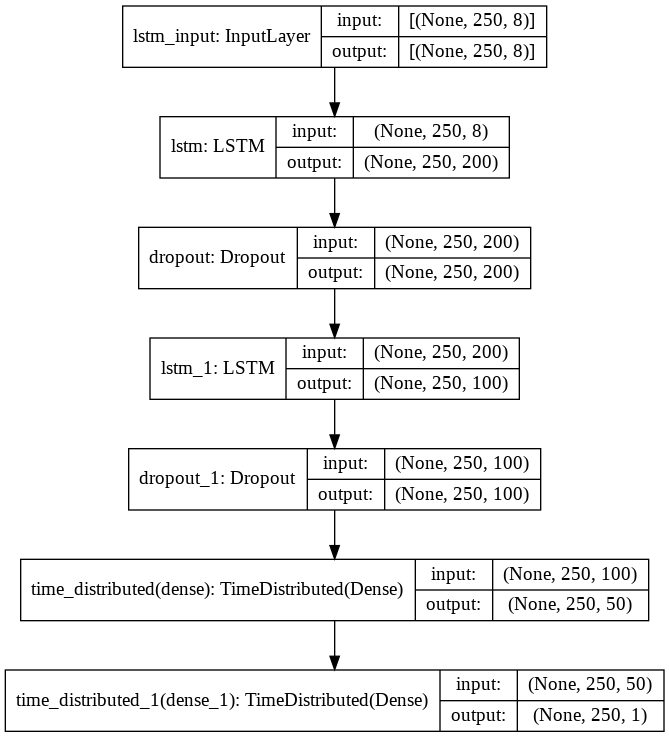

In [40]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [41]:


model.fit(trainX, trainY, validation_data=(validationX, validationY), epochs=epochs, batch_size=batch_size)

Epoch 1/150
24/24 [==============================] - 61s 1s/step - loss: 0.7387 - accuracy: 0.5291 - val_loss: 0.6927 - val_accuracy: 0.4983
Epoch 2/150
24/24 [==============================] - 23s 983ms/step - loss: 0.6962 - accuracy: 0.5126 - val_loss: 0.6878 - val_accuracy: 0.4653
Epoch 3/150
24/24 [==============================] - 26s 1s/step - loss: 0.6848 - accuracy: 0.5402 - val_loss: 0.9514 - val_accuracy: 0.5773
Epoch 4/150
24/24 [==============================] - 26s 1s/step - loss: 0.6631 - accuracy: 0.6076 - val_loss: 0.4672 - val_accuracy: 0.7850
Epoch 5/150
24/24 [==============================] - 26s 1s/step - loss: 0.6002 - accuracy: 0.6580 - val_loss: 0.5072 - val_accuracy: 0.7646
Epoch 6/150
24/24 [==============================] - 26s 1s/step - loss: 0.4995 - accuracy: 0.7680 - val_loss: 0.4560 - val_accuracy: 0.8111
Epoch 7/150
24/24 [==============================] - 27s 1s/step - loss: 0.4921 - accuracy: 0.7562 - val_loss: 0.5795 - val_accuracy: 0.7834
Epoch 8/15

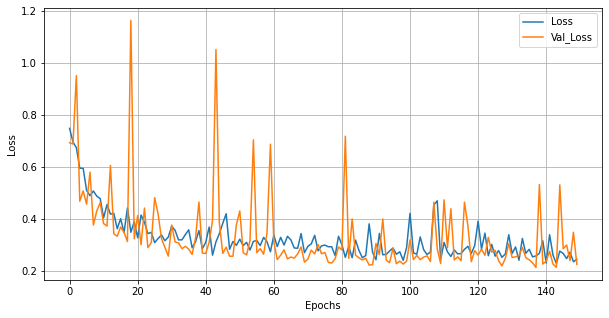

In [42]:
plt.figure(figsize = (10, 5))
plt.plot(model.history.history['loss'], label = 'Loss')
plt.plot(model.history.history['val_loss'], Label = 'Val_Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()

In [43]:
model.evaluate(testX,testY)

49/49 [==============================] - 12s 216ms/step - loss: 0.2012 - accuracy: 0.9256


[0.2011745721101761, 0.9256057143211365]

In [ ]:
model.save()

In [ ]:
neurons = 50
units = neurons*4
layer = 0
W = model.layers[layer].get_weights()[0]
U = model.layers[layer].get_weights()[1]
b = model.layers[layer].get_weights()[2]

W_i = W[:, :units]
W_f = W[:, units: units * 2]
W_c = W[:, units * 2: units * 3]
W_o = W[:, units * 3:]

U_i = U[:, :units]
U_f = U[:, units: units * 2]
U_c = U[:, units * 2: units * 3]
U_o = U[:, units * 3:]

b_i = b[:units]
b_f = b[units: units * 2]
b_c = b[units * 2: units * 3]
b_o = b[units * 3:]

spio.savemat('/content/drive/My Drive/Colab Notebooks/twist3/01_LSTM_Layer.mat', dict(W_i=W_i, W_f=W_f, W_c=W_c, W_o=W_o, U_i=U_i, U_f=U_f, U_c=U_c, U_o=U_o, b_i=b_i, b_f=b_f, b_c=b_c, b_o=b_o))

units = neurons*2
layer = 2
W = model.layers[layer].get_weights()[0]
U = model.layers[layer].get_weights()[1]
b = model.layers[layer].get_weights()[2]

W_i = W[:, :units]
W_f = W[:, units: units * 2]
W_c = W[:, units * 2: units * 3]
W_o = W[:, units * 3:]

U_i = U[:, :units]
U_f = U[:, units: units * 2]
U_c = U[:, units * 2: units * 3]
U_o = U[:, units * 3:]

b_i = b[:units]
b_f = b[units: units * 2]
b_c = b[units * 2: units * 3]
b_o = b[units * 3:]

spio.savemat('/content/drive/My Drive/Colab Notebooks/twist3/03_LSTM_Layer.mat', dict(W_i=W_i, W_f=W_f, W_c=W_c, W_o=W_o, U_i=U_i, U_f=U_f, U_c=U_c, U_o=U_o, b_i=b_i, b_f=b_f, b_c=b_c, b_o=b_o))

In [ ]:
layer = 4
W = model.layers[layer].get_weights()[0]
b = model.layers[layer].get_weights()[1]

spio.savemat('/content/drive/My Drive/Colab Notebooks/twist3/05_TimeDistributedDense_Layer.mat', dict(W=W, b=b))

layer = 5
W = model.layers[layer].get_weights()[0]
b = model.layers[layer].get_weights()[1]

spio.savemat('/content/drive/My Drive/Colab Notebooks/twist3/06_TimeDistributedDense_Layer.mat', dict(W=W, b=b))